In [68]:
from Bio import AlignIO
from Bio import motifs
import logomaker
import pandas as pd

In [56]:
alignment = AlignIO.read("dna.fna", "fasta")

In [57]:
sequences = [record.seq for record in alignment]

In [58]:
motif = motifs.create(sequences)

In [59]:
consensus = motif.consensus

In [60]:
pfm = motif.counts
print(counts)

        0      1      2      3      4      5      6      7
A:   5.00   1.00   0.00   0.00   5.00   5.00   0.00   0.00
C:   0.00   0.00   1.00   4.00   2.00   0.00   6.00   1.00
G:   1.00   1.00   6.00   3.00   0.00   1.00   0.00   0.00
T:   1.00   5.00   0.00   0.00   0.00   1.00   1.00   6.00



In [61]:
print(consensus)
for base in "ACGT":
    print(f"{base}: {' '.join(str(int(pfm[base][i])) for i in range(len(consensus)))}")

ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6


In [62]:
ppm = motif.counts.normalize()
print(ppm)

        0      1      2      3      4      5      6      7
A:   0.71   0.14   0.00   0.00   0.71   0.71   0.00   0.00
C:   0.00   0.00   0.14   0.57   0.29   0.00   0.86   0.14
G:   0.14   0.14   0.86   0.43   0.00   0.14   0.00   0.00
T:   0.14   0.71   0.00   0.00   0.00   0.14   0.14   0.86



In [63]:
pwm = ppm.log_odds()
print(pfm, ppm,pwm,sep='\n')

        0      1      2      3      4      5      6      7
A:   5.00   1.00   0.00   0.00   5.00   5.00   0.00   0.00
C:   0.00   0.00   1.00   4.00   2.00   0.00   6.00   1.00
G:   1.00   1.00   6.00   3.00   0.00   1.00   0.00   0.00
T:   1.00   5.00   0.00   0.00   0.00   1.00   1.00   6.00

        0      1      2      3      4      5      6      7
A:   0.71   0.14   0.00   0.00   0.71   0.71   0.00   0.00
C:   0.00   0.00   0.14   0.57   0.29   0.00   0.86   0.14
G:   0.14   0.14   0.86   0.43   0.00   0.14   0.00   0.00
T:   0.14   0.71   0.00   0.00   0.00   0.14   0.14   0.86

        0      1      2      3      4      5      6      7
A:   1.51  -0.81   -inf   -inf   1.51   1.51   -inf   -inf
C:   -inf   -inf  -0.81   1.19   0.19   -inf   1.78  -0.81
G:  -0.81  -0.81   1.78   0.78   -inf  -0.81   -inf   -inf
T:  -0.81   1.51   -inf   -inf   -inf  -0.81  -0.81   1.78



In [64]:
ppm = motif.counts.normalize(pseudocounts=0.1)
pwm = ppm.log_odds()
print(pwm)

        0      1      2      3      4      5      6      7
A:   1.46  -0.75  -4.21  -4.21   1.46   1.46  -4.21  -4.21
C:  -4.21  -4.21  -0.75   1.15   0.18  -4.21   1.72  -0.75
G:  -0.75  -0.75   1.72   0.74  -4.21  -0.75  -4.21  -4.21
T:  -0.75   1.46  -4.21  -4.21  -4.21  -0.75  -0.75   1.72



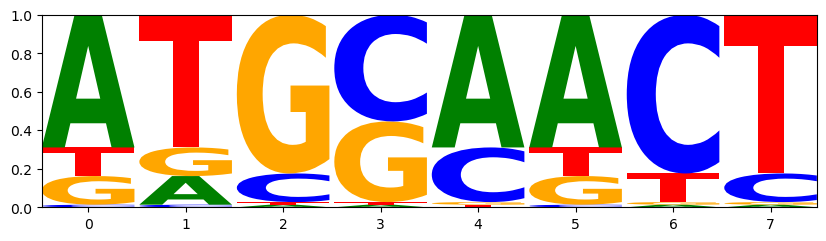

In [70]:
df = pd.DataFrame(ppm)
logomaker.Logo(df, color_scheme="classic")